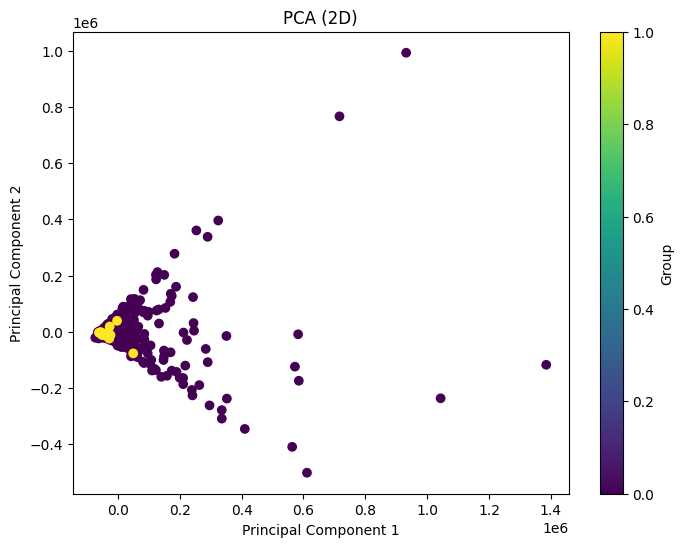

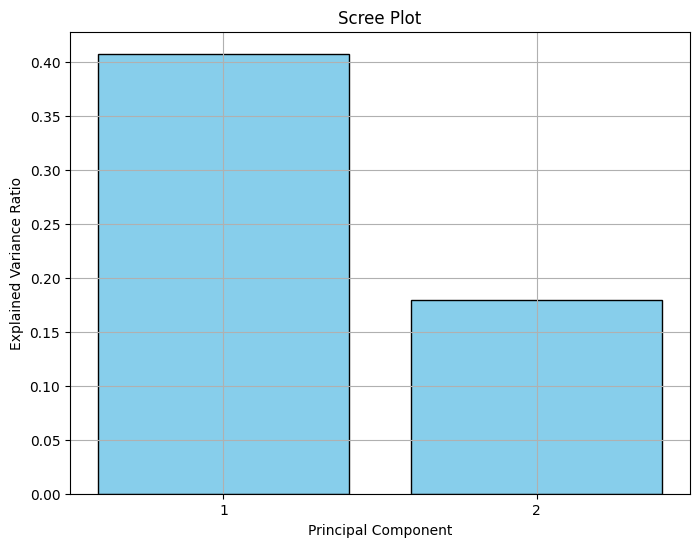

In [1]:
import os

import numpy as np

import scipy.io as sio

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

def get_key_incorrect(dir_path_load):
    key_incorrect = []

    for file_name in os.listdir(dir_path_load):
        file_path = os.path.join(dir_path_load, file_name)
        
        if not file_name.endswith('.mat'):
            print(f"{file_name} doesn't end with .mat")
        
        mat_dictionary = sio.loadmat(file_path)

        # get incorrect key
        key = mat_dictionary['key']
        incorrect_indicies = mat_dictionary['incorrect_indices']
        key = [key[i] for i in incorrect_indicies]
        
        key_incorrect.extend(key[0])

    return key_incorrect

def load_mat_data_correctness(dir_path_load, key_incorrect):
    x_correct = []
    x_incorrect = []

    for file_name in os.listdir(dir_path_load):
        if file_name.endswith('.mat'):
            #get key
            key = os.path.splitext(file_name)[0]
            
            #load mat dictionary
            file_path = os.path.join(dir_path_load, file_name)
            mat_dictionary = sio.loadmat(file_path)

            #append to x
            if key in key_incorrect:
                x_incorrect.append(mat_dictionary[key])
            else:
                x_correct.append(mat_dictionary[key])
        else:
            print(f"'{file_name}' doesn't end with '{'.mat'}'")
    return x_correct, x_incorrect 

key_incorrect = get_key_incorrect("/home/unixuser/cdproject/result/public_data/PSD_segmentation/predict/1/StratifiedGroupKFold")

x_correct_HC, x_incorrect_HC = load_mat_data_correctness("/home/unixuser/cdproject/data/public_data/PSD_segmentation/HC", key_incorrect)
x_correct_ADHD, x_incorrect_ADHD = load_mat_data_correctness("/home/unixuser/cdproject/data/public_data/PSD_segmentation/ADHD", key_incorrect)
x_correct = x_correct_HC + x_correct_ADHD
x_incorrect = x_incorrect_HC + x_incorrect_ADHD

x = np.array(x_correct + x_incorrect)
labels = np.array([0]*len(x_correct) + [1]*len(x_incorrect))
x = x.reshape(x.shape[0], x.shape[1] * x.shape[2])

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
explained_variance_ratio_ = pca.explained_variance_ratio_

# plot PCA with y
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter, label='Group')
plt.title(f"PCA (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio_) + 1), explained_variance_ratio_, color='skyblue', edgecolor='black')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

In [ ]:
import os

import numpy as np

import scipy.io as sio

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

def get_key_incorrect(dir_path_load):
    key_incorrect = []

    for file_name in os.listdir(dir_path_load):
        file_path = os.path.join(dir_path_load, file_name)
        
        if not file_name.endswith('.mat'):
            print(f"{file_name} doesn't end with .mat")
        
        mat_dictionary = sio.loadmat(file_path)

        # get incorrect key
        key = mat_dictionary['key']
        incorrect_indicies = mat_dictionary['incorrect_indices']
        key = [key[i] for i in incorrect_indicies]
        
        key_incorrect.extend(key[0])

    return key_incorrect

def load_mat_data_correctness(dir_path_load, key_incorrect):
    x_correct = []
    x_incorrect = []

    for file_name in os.listdir(dir_path_load):
        if file_name.endswith('.mat'):
            #get key
            key = os.path.splitext(file_name)[0]
            
            #load mat dictionary
            file_path = os.path.join(dir_path_load, file_name)
            mat_dictionary = sio.loadmat(file_path)

            #append to x
            if key in key_incorrect:
                x_incorrect.append(mat_dictionary[key])
            else:
                x_correct.append(mat_dictionary[key])
        else:
            print(f"'{file_name}' doesn't end with '{'.mat'}'")
    return x_correct, x_incorrect 

key_incorrect = get_key_incorrect("/home/unixuser/cdproject/result/public_data/PSD_segmentation/predict/1/StratifiedKFold")

x_correct_HC, x_incorrect_HC = load_mat_data_correctness("/home/unixuser/cdproject/data/public_data/PSD_segmentation/HC", key_incorrect)
x_correct_ADHD, x_incorrect_ADHD = load_mat_data_correctness("/home/unixuser/cdproject/data/public_data/PSD_segmentation/ADHD", key_incorrect)
x_correct = x_correct_HC + x_correct_ADHD
x_incorrect = x_incorrect_HC + x_incorrect_ADHD

x = np.array(x_correct + x_incorrect)
labels = np.array([0]*len(x_correct) + [1]*len(x_incorrect))
x = x.reshape(x.shape[0], x.shape[1] * x.shape[2])

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
explained_variance_ratio_ = pca.explained_variance_ratio_

# plot PCA with y
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter, label='Group')
plt.title(f"PCA (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio_) + 1), explained_variance_ratio_, color='skyblue', edgecolor='black')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio_) + 1))  # x축 값을 1, 2로 설정
plt.grid(True)
plt.show()